<a href="https://colab.research.google.com/github/k1151msarandega/QuCode-21-Days-of-Quantum-Challenge-Diary/blob/main/Day02_Probability_Theory_%26_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 02 — Probability Theory & Statistics

> _QuCode 21 Days of Quantum Challenge — Learning notebook_
>
> **Date:** 2025-09-02  
> **Author:** Kudzai Musarandega  
> **Tags:** quantum, learning, challenge, day-02
>
> **Learning objectives**
> - Build intuition for conditional probability and the law of total probability.
> - Understand Bayes’ Theorem with the “prior × likelihood / evidence” structure.
> - Recognise when Bayes’ Theorem is appropriate and translate word problems into $P(\cdot)$ notation.
> - Compute posteriors in simple diagnostic and classification settings.
>
> **Key takeaways (summary-first)**
> - Conditional probability: $P(A\mid B)=\dfrac{P(A\cap B)}{P(B)}$.
> - Law of total probability: $P(E)=\sum_i P(E\mid H_i)P(H_i)$ for a partition $\{H_i\}$.
> - **Bayes’ Theorem:** $$P(H\mid E)=\frac{P(E\mid H)\,P(H)}{P(E)}=\frac{P(E\mid H)\,P(H)}{P(E\mid H)\,P(H)+P(E\mid \neg H)\,P(\neg H)}.$$
> - **Vocabulary:** prior $P(H)$, likelihood $P(E\mid H)$, evidence $P(E)$, posterior $P(H\mid E)$.
> - Intuition: evidence **updates** priors; it does not replace them.



## Resources
- **Official/Assigned:**
    - [3Blue1Brown: Bayes theorem, the geometry of changing beliefs](https://www.youtube.com/watch?v=HZGCoVF3YvM)
    - [The Organic Chemistry Tutor](https://www.youtube.com/watch?v=OByl4RJxnKA)
- **Extra reading:**
    - [StatQuest: Statistics Fundamentals](https://youtube.com/playlist?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&si=01dmzqm_7wFfc4zs)
- **Original notes:**


In [ ]:
# %% [markdown]
# ### Environment setup (Colab)
# If you are running on Colab for the first time today, uncomment to install.
# This cell intentionally avoids heavy installs by default.
#
# !pip -q install qiskit pennylane matplotlib numpy

import sys, platform, math, json, numpy as np

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
np.random.seed(42)


## 1. Concepts in brief
- Conditional probability quantifies proportions within a restricted space.
- Bayes’ Theorem updates belief about a hypothesis H after observing evidence E.
- The denominator P(E) is usually expanded via the law of total probability.



## 2. Worked examples

In [ ]:
# ## 2. Worked examples

# ### Example A: “Steve” style prior-vs-likelihood update
# Hypotheses: H = "Librarian", ¬H = "Farmer"
# Priors (toy numbers for illustration): P(H)=1/21, P(¬H)=20/21
# Likelihoods (how often the description fits): P(E|H)=0.40, P(E|¬H)=0.10

import numpy as np

P_H = 1/21
P_notH = 1 - P_H

P_E_given_H = 0.40
P_E_given_notH = 0.10

# Evidence probability via total probability
P_E = P_E_given_H*P_H + P_E_given_notH*P_notH

# Posterior
P_H_given_E = P_E_given_H*P_H / P_E

P_H, P_notH, P_E, P_H_given_E

(0.047619047619047616,
 0.9523809523809523,
 0.11428571428571428,
 0.16666666666666669)

In [ ]:
# **Interpretation (Example A):**
# Even if the description is 4× more common among librarians than farmers,
# the abundance of farmers can dominate the posterior.

# ### Example B: Medical test (from Resource 2)
# Prevalence/prior: P(C) = 0.12
# Sensitivity: P(Pos|C) = 0.95
# False positive rate: P(Pos|¬C) = 0.06

P_C = 0.12
P_notC = 1 - P_C
P_Pos_given_C = 0.95
P_Pos_given_notC = 0.06

P_Pos = P_Pos_given_C*P_C + P_Pos_given_notC*P_notC
P_C_given_Pos = P_Pos_given_C*P_C / P_Pos
P_notC_given_Pos = 1 - P_C_given_Pos

P_Pos, P_C_given_Pos, P_notC_given_Pos

(0.1668, 0.6834532374100719, 0.3165467625899281)

**Interpretation (Example B):**
With 12% prevalence and a good (but imperfect) test,
P(C|Positive) is about 0.683 → positives are informative, but not definitive.


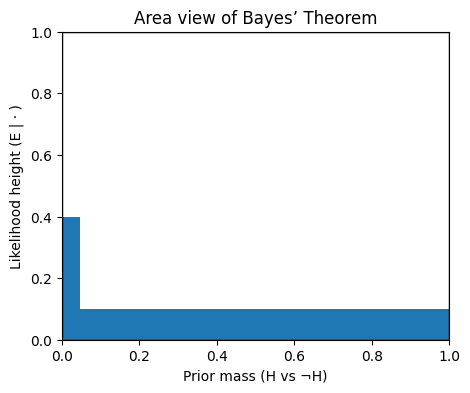

In [ ]:
# OPTIONAL: Area diagram (Matplotlib) — simple rectangles for evidence regions
import matplotlib.pyplot as plt

# Rectangle areas for the two branches contributing to P(E)
left_width = P_H
right_width = P_notH
left_height = P_E_given_H
right_height = P_E_given_notH

fig, ax = plt.subplots(figsize=(5, 4))
# Left rectangle: H ∧ E
ax.add_patch(plt.Rectangle((0, 0), left_width, left_height))
# Right rectangle: ¬H ∧ E
ax.add_patch(plt.Rectangle((left_width, 0), right_width, right_height))

# Outline the 1x1 square
ax.add_patch(plt.Rectangle((0, 0), 1, 1, fill=False))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Prior mass (H vs ¬H)")
ax.set_ylabel("Likelihood height (E | · )")
ax.set_title("Area view of Bayes’ Theorem")
plt.show()

## 3. Try it yourself
- **Change the priors:** In Example A, set $P(H)=1/100$ with the same likelihoods. How much does $P(H\mid E)$ drop?
- **Better test, rarer disease:** In Example B, set $P(C)=0.01$, $P(\text{Pos}\mid C)=0.99$, $P(\text{Pos}\mid \neg C)=0.01$. What is $P(C\mid \text{Pos})$?
- **Three-way partition:** Suppose a patient might have one of three strains $H_1,H_2,H_3$ with priors $0.1,0.2,0.7$ and test hit rates $0.9,0.6,0.2$ for a marker $E$. Compute $P(H_i\mid E)$.


## 4. Reflection
- Which step is most error-prone for you: setting priors, choosing likelihoods, or expanding $P(E)$?
- In your own words: why doesn’t strong evidence always imply a high posterior?
- Where do you expect Bayes to show up later in quantum topics (e.g., state tomography, noise inference)?


---
### Links
- **Open in Colab (from GitHub):** replace `YOUR_GITHUB_USERNAME/qucode-21days`
  - `https://colab.research.google.com/github/YOUR_GITHUB_USERNAME/qucode-21days/blob/main/Day02_Single-Qubit_Gates.ipynb.ipynb`
- **Report an issue / suggest a fix:** link to your repo issues page
